<a href="https://colab.research.google.com/github/LuizFelipe33/Atv_Rede_Neural/blob/main/Atv_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de dados de valores de casas em Paris 
   Utilizamos uma base de dados do Kaggle de preço de casas ficticias em Paris. O preço é definido pelos seguintes critérios:
   - **SquareMeters** - Metros quadrados.
   - **NumberOfRooms** - Números de quartos.
   - **HasYard** - Se possui ou não quintal.
   - **HasPool** - Se possui ou não piscina.
   - **Floors** - Quantidade de andares.
   - **CityCode** - Código postal.
   - **CityPartRange** - Quantidade de vizinhos.
   - **NumPrevOwners** - Quantidade de donos que a casa já teve. 
   - **Made** - Ano de construção.
   - **IsNewBuilt** - Casa nova.
   - **HasStormProtector** - Proteção contra tempestades. 
   - **Basement** - Se possui porão e o tamanho
   - **Attic** - Se possui  sótão e o tamanho.
   - **Garage** - Quantidade de garagens.
   - **HasStorageRoom** - Se possui despensa e o tamanho.
   - **HasGuestRoom** - Quantidade de quartos de hospedes.
   - **Price** - Preço do imóvel. 

													

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import numpy as np

In [ ]:
housedata = pd.read_csv('/content/ParisHousing.csv')
df = pd.DataFrame(housedata)
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
for j in df.columns:
  ausentes = df[j].isna().sum()
  print(j, ausentes)

squareMeters 0
numberOfRooms 0
hasYard 0
hasPool 0
floors 0
cityCode 0
cityPartRange 0
numPrevOwners 0
made 0
isNewBuilt 0
hasStormProtector 0
basement 0
attic 0
garage 0
hasStorageRoom 0
hasGuestRoom 0
price 0


In [ ]:
df['cityCode'].value_counts()

97260    3
95054    3
82521    3
56356    3
39297    3
        ..
90146    1
9439     1
36609    1
88278    1
18412    1
Name: cityCode, Length: 9509, dtype: int64

In [ ]:
df = df.drop(columns=['cityCode','numPrevOwners','cityPartRange','made'])

In [ ]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,0,1,2590,6174,339,1,4,5905107.0


In [ ]:
df = pd.get_dummies(df, columns = ['hasYard','hasPool','isNewBuilt','hasStormProtector', 'hasStorageRoom'])

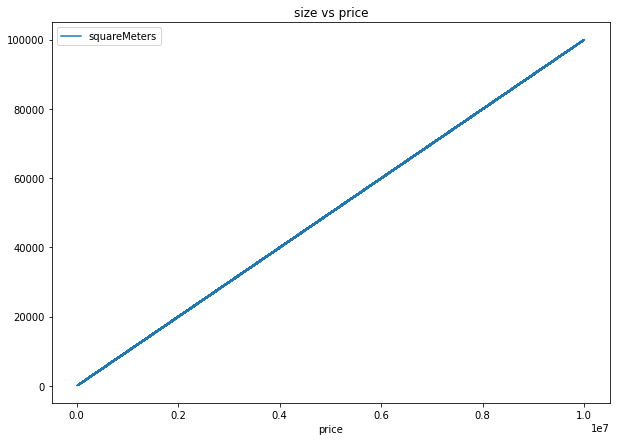

In [ ]:
df.plot(x='price', y='squareMeters', figsize=(10,7), title = 'size vs price')

#Box Plot

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


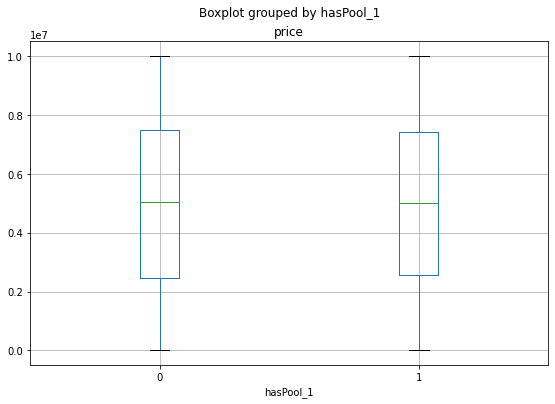

In [ ]:
df.boxplot(by='hasPool_1', column='price', figsize=(9,6))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


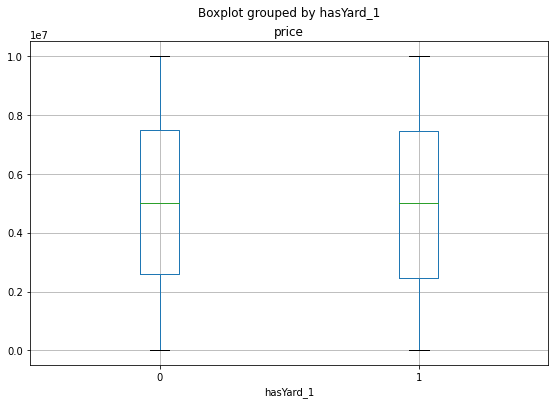

In [ ]:
df.boxplot(by='hasYard_1', column='price', figsize=(9,6))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


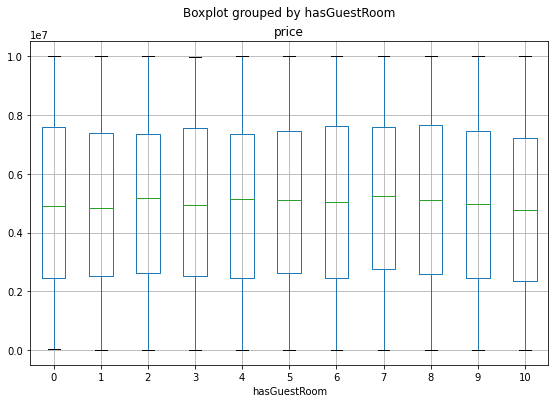

In [ ]:
df.boxplot(by='hasGuestRoom', column='price', figsize=(9,6))

#Gráfico de correlação 

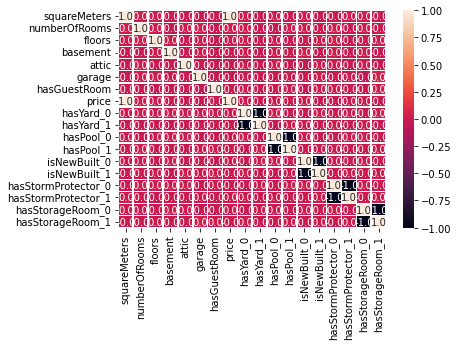

In [ ]:
correlation = df.corr()
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

#Separando de forma aleatória treino e test

In [ ]:
train_data = df.sample(frac=0.75, random_state=1)
getindex = df.sample(frac=0.75, random_state=1).index
train_label = train_data['price']

test_data = df.drop(index = getindex)
test_label = test_data['price']

train_data = train_data.drop(columns = ['price'])
test_data = test_data.drop(columns = ['price'])

In [ ]:
from sklearn.model_selection import cross_validate

#Standard Scaler

In [ ]:
sc = StandardScaler()

def transformar (data):
  col = data.columns
  data = sc.fit_transform(data)
  data1 = pd.DataFrame(data)
  data1.columns = col
  return data1

X_train_scaled = transformar(train_data)
X_test_scaled = transformar(test_data)

In [ ]:
X_train_scaled

,squareMeters,numberOfRooms,floors,basement,attic,garage,hasGuestRoom,hasYard_0,hasYard_1,hasPool_0,hasPool_1,isNewBuilt_0,isNewBuilt_1,hasStormProtector_0,hasStormProtector_1,hasStorageRoom_0,hasStorageRoom_1
0,0.952286,-0.019400,-1.106368,-0.481250,0.194821,-0.319826,0.632674,-0.976542,0.976542,-1.012343,1.012343,0.994681,-0.994681,-0.998135,0.998135,1.005616,-1.005616
1,0.887043,-1.098701,0.410823,-0.432989,-1.436921,1.559313,-1.256782,-0.976542,0.976542,0.987808,-0.987808,-1.005348,1.005348,1.001868,-1.001868,1.005616,-1.005616
2,-1.168316,0.711740,1.548716,1.102677,-0.181047,1.517723,-0.312054,1.024022,-1.024022,0.987808,-0.987808,0.994681,-0.994681,1.001868,-1.001868,1.005616,-1.005616
3,1.441248,1.233982,-0.623625,1.333565,-0.217155,0.353186,0.317764,-0.976542,0.976542,0.987808,-0.987808,-1.005348,1.005348,1.001868,-1.001868,1.005616,-1.005616
4,-0.518553,-1.203149,1.169418,-0.907265,0.644969,-1.612915,-0.626963,-0.976542,0.976542,-1.012343,1.012343,0.994681,-0.994681,-0.998135,0.998135,1.005616,-1.005616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,-1.276154,-1.655759,-0.864996,-0.632976,-0.236069,-0.501312,0.947583,-0.976542,0.976542,0.987808,-0.987808,-1.005348,1.005348,-0.998135,0.998135,-0.994416,0.994416
7496,-0.298473,1.059901,-1.313257,-0.216683,-0.108487,1.668961,0.317764,-0.976542,0.976542,-1.012343,1.012343,-1.005348,1.005348,-0.998135,0.998135,1.005616,-1.005616
7497,0.869145,0.398394,0.548749,0.907898,-0.066533,0.598949,0.632674,-0.976542,0.976542,-1.012343,1.012343,0.994681,-0.994681,1.001868,-1.001868,-0.994416,0.994416
7498,1.699342,-0.193480,0.686676,-0.360424,0.314494,1.464789,1.577401,1.024022,-1.024022,-1.012343,1.012343,-1.005348,1.005348,-0.998135,0.998135,1.005616,-1.005616


#Rede Neural


In [ ]:
rede_neural = MLPRegressor(hidden_layer_sizes=(100,100,10), max_iter=1500, alpha=0.01, verbose=True)

In [ ]:
rede_neural.fit(X_train_scaled, train_label)

Iteration 1, loss = 16653015583073.84375000
Iteration 2, loss = 16652845263427.84765625
Iteration 3, loss = 16652056866633.03320312
Iteration 4, loss = 16649521687816.24804688
Iteration 5, loss = 16643315997372.06250000
Iteration 6, loss = 16630593437063.81640625
Iteration 7, loss = 16607651015398.13281250
Iteration 8, loss = 16570005506462.53515625
Iteration 9, loss = 16512172338148.84179688
Iteration 10, loss = 16428651455199.90820312
Iteration 11, loss = 16312464177528.82617188
Iteration 12, loss = 16157773539966.64257812
Iteration 13, loss = 15957317227231.15039062
Iteration 14, loss = 15704509404377.92187500
Iteration 15, loss = 15392984828578.83984375
Iteration 16, loss = 15018368006732.62890625
Iteration 17, loss = 14573903368294.01562500
Iteration 18, loss = 14058004294034.45507812
Iteration 19, loss = 13469918350507.58593750
Iteration 20, loss = 12810450020359.15039062
Iteration 21, loss = 12084732488275.92968750
Iteration 22, loss = 11297231155350.98242188
Iteration 23, loss 

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100, 10), max_iter=1500,
             verbose=True)

###Cross Validation

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(rede_neural, X_train_scaled, train_label, cv = 10)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 282, loss = 59311392815.31084442
Iteration 283, loss = 58852047076.59387207
Iteration 284, loss = 58536094758.67206573
Iteration 285, loss = 58051151353.24973297
Iteration 286, loss = 57572483284.43829346
Iteration 287, loss = 57145016404.94123840
Iteration 288, loss = 56704317344.96311951
Iteration 289, loss = 56218640430.68910980
Iteration 290, loss = 55781235892.49092865
Iteration 291, loss = 55232187588.39685822
Iteration 292, loss = 54754347768.38796997
Iteration 293, loss = 54252519919.46840668
Iteration 294, loss = 53718279458.47090912
Iteration 295, loss = 53170597975.07808685
Iteration 296, loss = 52578678594.81891632
Iteration 297, loss = 52063763817.55145264
Iteration 298, loss = 51440949102.09297943
Iteration 299, loss = 50864875610.32798767
Iteration 300, loss = 50235943983.86748505
Iteration 301, loss = 49581775436.49526215
Iteration 302, loss = 48928806797.01187134
Iteration 303, loss = 48267716906.3351

In [ ]:
previsao = rede_neural.predict(X_test_scaled)
previsao

array([7601918.16563965, 5601919.09835017, 8031389.91246603, ...,
       9167912.18969676, 3368407.15832052,  156248.24934168])

In [ ]:
cross_val

array([0.99999872, 0.99999849, 0.99999858, 0.99999842, 0.99999864,
       0.99999839, 0.99999886, 0.99999851, 0.99999883, 0.99999882])

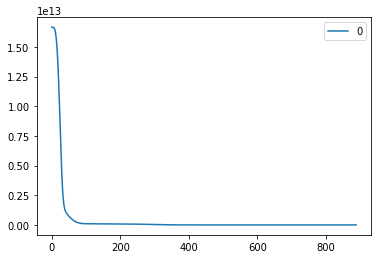

In [ ]:
pd.DataFrame(rede_neural.loss_curve_).plot()

#Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [ ]:
arvore = DecisionTreeRegressor(max_depth=4)
arvore.fit(X_train_scaled, train_label)

DecisionTreeRegressor(max_depth=4)

###Cross Validation

In [ ]:
cross_val2 = cross_val_score(arvore, X_train_scaled, train_label, cv = 10)

In [ ]:
cross_val2

array([0.99566794, 0.99594048, 0.99585573, 0.99604803, 0.99606499,
       0.99661113, 0.99607222, 0.99614273, 0.99612305, 0.9959748 ])

In [ ]:
arvore.predict(X_test_scaled)

array([7782832.61425619, 5883794.59506438, 7782832.61425619, ...,
       9076925.14271654, 3420513.75464135,  312244.07111111])

[Text(0.5, 0.9, 'X[0] <= -0.01\nsquared_error = 8311775782712.688\nsamples = 7500\nvalue = 4999428.907'),
 Text(0.25, 0.7, 'X[0] <= -0.871\nsquared_error = 2094610771966.016\nsamples = 3707\nvalue = 2478767.872'),
 Text(0.125, 0.5, 'X[0] <= -1.307\nsquared_error = 518843701910.606\nsamples = 1870\nvalue = 1232037.197'),
 Text(0.0625, 0.3, 'X[0] <= -1.518\nsquared_error = 126739781311.257\nsamples = 931\nvalue = 602146.843'),
 Text(0.03125, 0.1, 'squared_error = 32704673240.964\nsamples = 495\nvalue = 312244.071'),
 Text(0.09375, 0.1, 'squared_error = 29754975151.394\nsamples = 436\nvalue = 931279.577'),
 Text(0.1875, 0.3, 'X[0] <= -1.085\nsquared_error = 124195376478.046\nsamples = 939\nvalue = 1856561.073'),
 Text(0.15625, 0.1, 'squared_error = 33381712220.041\nsamples = 492\nvalue = 1565867.977'),
 Text(0.21875, 0.1, 'squared_error = 28769115601.291\nsamples = 447\nvalue = 2176518.576'),
 Text(0.375, 0.5, 'X[0] <= -0.439\nsquared_error = 505742001101.184\nsamples = 1837\nvalue = 3747

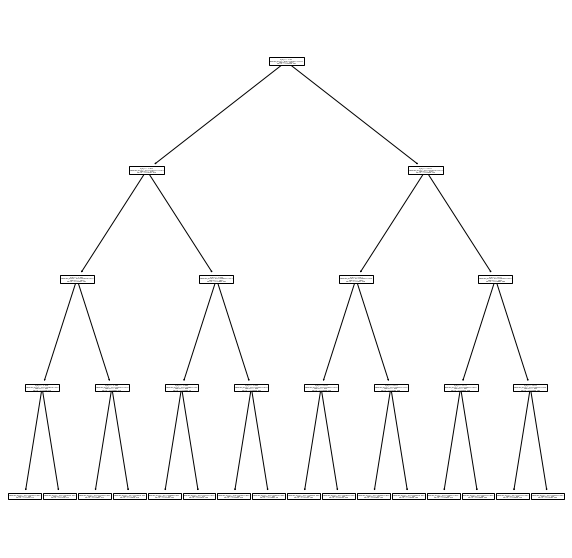

In [ ]:
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(arvore)

In [ ]:
arvore.score(X_test_scaled, test_label)

0.9959615952958276